# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Dataset**

In [2]:
df=pd.read_csv(r"Cardekho Data.csv")

## **Basic Information about the Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20026 entries, 0 to 20025
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Source.Name            20026 non-null  object 
 1   web-scraper-order      20026 non-null  object 
 2   web-scraper-start-url  20026 non-null  object 
 3   full_name              19980 non-null  object 
 4   selling_price          19980 non-null  object 
 5   new-price              9566 non-null   object 
 6   year                   19980 non-null  float64
 7   seller_type            19980 non-null  object 
 8   km_driven              19980 non-null  object 
 9   owner_type             19980 non-null  object 
 10  fuel_type              19980 non-null  object 
 11  transmission_type      19980 non-null  object 
 12  mileage                19980 non-null  object 
 13  engine                 19921 non-null  object 
 14  max_power              19921 non-null  object 
 15  se

**The dataset consists of 16 features (columns) and 20026 rows. All the columns except 'year' column are of object datatype and the 'year' column is of float datatype.**

**Feature 'new price' has the highest number of null values i.e 9566 non-null values out of 20026. All the other features has less than 5% null values.**

In [4]:
df.head()

,Source.Name,web-scraper-order,web-scraper-start-url,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,cardekho_extract(0-2000).csv,1611917819-1662,https://www.cardekho.com/used-car-details/used...,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,cardekho_extract(0-2000).csv,1611918361-1902,https://www.cardekho.com/used-car-details/used...,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,cardekho_extract(0-2000).csv,1611917012-1306,https://www.cardekho.com/used-car-details/used...,Hyundai i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,cardekho_extract(0-2000).csv,1611917695-1607,https://www.cardekho.com/used-car-details/used...,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,cardekho_extract(0-2000).csv,1611914861-367,https://www.cardekho.com/used-car-details/used...,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


**It can be observed that the columns 'Source.Name','web-scraper-order' and 'web-scraper-start-url' does not provide any valuable insights about the car features in particular. Hence removing the three columns.**

In [5]:
df.drop('Source.Name', inplace=True, axis=1)
df.drop('web-scraper-start-url', inplace=True, axis=1)
df.drop('web-scraper-order', inplace=True, axis=1)

# **Data Cleaning and Exploratory Data Analysis**

**There is 3292 unique cars in the dataset with the same model having different names. This increases the complexity of the names column, therefore creating a new column as "Company" and "Model". This creates uniformity for the name column.**

**Also since Company and Model name columns are created, now removing the full name column as it would create redundancy.**

In [6]:
df["full_name"]=df["full_name"].str.upper()
df["Company"]=df["full_name"].str.split(" ", n = 2, expand = True)[0]
df['Model']=df["full_name"].str.split(" ", n = 2, expand = True)[1]

df.drop('full_name', inplace=True, axis=1)

**There are 42 unique company names in the dataset. Below are the diffrent company names in the dataset**

In [7]:

print('There are {} unique company names in the dataset.'.format(len(df.Company.unique())))
print(df.Company.unique())

There are 42 unique company names in the dataset.
['MARUTI' 'HYUNDAI' 'FORD' 'MAHINDRA' 'TATA' 'RENAULT' 'NISSAN' 'MINI'
 'MERCEDES-BENZ' 'TOYOTA' 'FIAT' 'VOLKSWAGEN' 'HONDA' 'CHEVROLET'
 'AMBASSADOR' 'DATSUN' 'KIA' 'BMW' 'MITSUBISHI' 'AUDI' 'SKODA' nan 'LAND'
 'JAGUAR' 'DAEWOO' 'BENTLEY' 'MG' 'ISUZU' 'PORSCHE' 'VOLVO' 'LEXUS' 'JEEP'
 'PREMIER' 'MASERATI' 'FORCE' 'LAMBORGHINI' 'FERRARI' 'OPELCORSA'
 'MERCEDES-AMG' 'DC' 'ROLLS-ROYCE' 'OPEL']


**The below plot represents the word cloud for Company names in the dataset.**

**Hyundai, Honda, Maruti, Skoda and Mahindra are most common car companies in the dataset.**

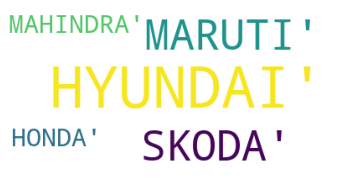

In [8]:
from wordcloud import WordCloud
word_cloud = WordCloud(background_color = 'white').generate(str(df['Company'].values))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

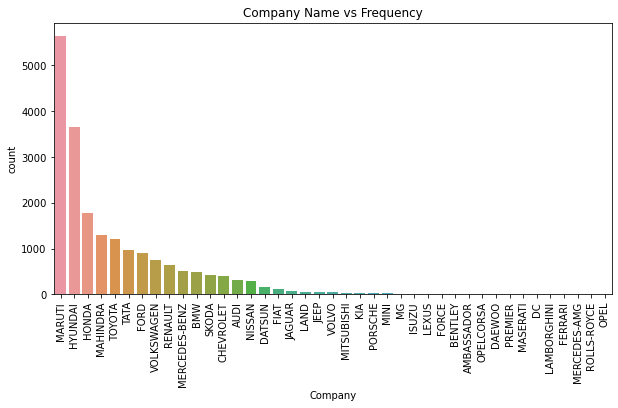

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='Company' , data=df,order = df['Company'].value_counts().index )
plt.xticks(rotation=90);
plt.title("Company Name vs Frequency");


**There are 274 unique car model names in the dataset. Below are the diffrent car names in the dataset**

In [10]:
print('There are {} unique car model names in the dataset.'.format(len(df.Model.unique())))
print(df.Model.unique())

There are 274 unique car model names in the dataset.
['ALTO' 'GRAND' 'I20' 'ECOSPORT' 'WAGON' 'I10' 'VENUE' 'TUV' 'INDIGO'
 'CAPTUR' 'SWIFT' 'MICRA' 'VERNA' 'DUSTER' 'COOPER' 'CIAZ' 'C-CLASS'
 'INNOVA' 'BALENO' 'GRANDE' 'VENTO' 'CRETA' 'XYLO' 'CITY' 'BOLERO'
 'FORTUNER' 'KWID' 'AMAZE' 'SANTRO' 'XUV500' 'SAIL' 'XCENT' '800' 'AVIGO'
 'NANO' 'KUV100' 'ETIOS' 'IGNIS' 'COROLLA' 'REDIGO' 'VISTA' 'OMNI'
 'SCORPIO' 'MARAZZO' 'ASPIRE' 'FIGO' 'SUPRO' 'VITARA' 'TIAGO' 'POLO'
 'SELTOS' 'BEAT' 'CELERIO' 'TERRANO' 'SANTA' 'GO' '5' 'CR-V' 'ENDEAVOUR'
 'KUV' 'AVEO' 'JAZZ' 'PAJERO' 'INDICA' '3' 'RITZ' 'S-CROSS' 'SUMO' 'NEW'
 'Q5' 'A4' 'TIGOR' 'MANZA' 'BRIO' 'SX4' 'Q3' 'ERTIGA' 'SAFARI' 'SUNNY'
 'GLA' 'THAR' 'HEXA' 'ZEN' 'LAURA' 'AVVENTURA' nan 'ROVER' 'BRV' 'EECO'
 'A6' 'E-CLASS' 'QUANTO' 'Q7' 'NUVOSPORT' 'Z4' 'KOLEOS' 'A3' '6' 'LAND'
 'SCALA' 'XF' 'X5' 'ZEST' 'CLA' 'MATIZ' 'MULSANNE' 'HECTOR' 'EON' 'AMEO'
 'SPARK' 'GLE' 'CIVIC' 'KIZASHI' 'D-MAX' 'CAYENNE' 'FABIA' 'X1' 'RAPID'
 'FREESTYLE' 'BOLT' 'SUPE

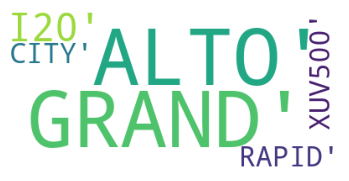

In [11]:
from wordcloud import WordCloud
word_cloud = WordCloud(background_color = 'white').generate(str(df['Model'].values))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

**Selling Price column has entries in Thousands, Lakhs and Crores with the text. Therefore removing the units and multiplying the respective units with the numerical values.**

In [12]:
df["SP"]=df["selling_price"].str.split(" ", n = 2, expand = True)[0]
df["SP_range"]=df["selling_price"].str.split(" ", n = 2, expand = True)[1]
df["SP"]=df['SP'].str.replace('*','')
df['SP']=df['SP'].str.replace(',','')
df['SP']=pd.to_numeric(df['SP'])
df['SP'] = np.where(df['SP_range'] == 'Lakh*',df['SP'] * 100000,df['SP'])
df['SP'] = np.where(df['SP_range'] == 'Cr*',df['SP'] * 10000000,df['SP'])
df.drop('SP_range', inplace=True, axis=1)
df.drop('selling_price', inplace=True, axis=1)
df['selling_price']=df['SP']
df.drop('SP', inplace=True, axis=1)

C:\Users\DHRUV~1.BHA\AppData\Local\Temp/ipykernel_20360/3764464627.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["SP"]=df['SP'].str.replace('*','')


In [13]:
df['selling_price'].describe()

count    1.998000e+04
mean     7.392066e+05
std      9.103088e+05
min      2.500000e+04
25%      3.400000e+05
50%      5.200000e+05
75%      7.850000e+05
max      3.950000e+07
Name: selling_price, dtype: float64

**Univariate Analysis: Plotting distribution plot for selling price column. The selling price data is rightly skewed with outliers. Hence the plot with normal scale did not provide any useful insights. Therefor to reduce the effect of such outliers in the plot only, log scale is used.**


**Observations**

*   **The minimum selling price amount is 25,000 and max is 3.95 crore.**
*   **The major distribution falls between 1 lakh to 1 crore.**


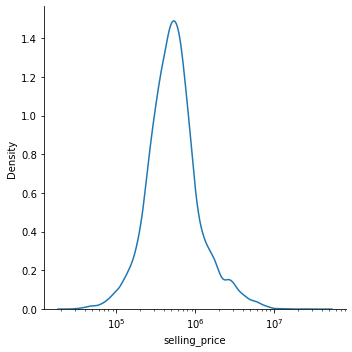

In [14]:
sns.displot(data=df,x="selling_price",kind="kde",log_scale=10)

**Kilometeres driven column (km_driven) has all numerical values but with text 'kms' with the numerical number. Therefore removing the text from the column.**

In [15]:
df["km_driven"]=df["km_driven"].str.split(" ", n = 1, expand = True)[0].str.replace(',','')
df["km_driven"]=pd.to_numeric(df["km_driven"])

In [16]:
df['km_driven'].describe()

count    1.998000e+04
mean     5.824488e+04
std      5.172509e+04
min      1.000000e+02
25%      3.116425e+04
50%      5.200000e+04
75%      7.400000e+04
max      3.800000e+06
Name: km_driven, dtype: float64

**Univariate Analysis: Plotting distribution plot for kilometer driven column. The data is rightly skewed with outliers. Hence the plot with normal scale did not provide any useful insights. Therefore to reduce the effect of such outliers in the plot only, log scale is used.**


**Observations**

*   **The minimum km driven is 100 kms and max is 3800000 kms.**
*   **The majority of cars have driven between 10,000 to 1,00,000 kms**

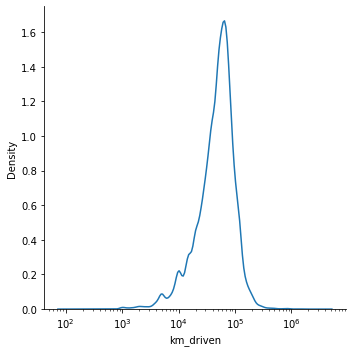

In [17]:
sns.displot(data=df,x="km_driven",kind="kde",log_scale=10)

**Mileage column has units such as 'kmpl', 'km/kg' and 'km/hr'. Out of these clearly km/hr does not represent mileage but speed hence removing these values. Also removing text from the column and few values of more than 100 were observed which is not correct for mileage, hence removing those values also.**

In [18]:
df['mileage']=df["mileage"].str.split(" ", n = 2, expand = True)[0].str[7:]
df["mileage"]=pd.to_numeric(df["mileage"])

# It is observed that some values of mileage were greater than 100 (110 and 120) which is not possible. Therefore replacing thoses values with null value.

df[df['mileage'] > 100] = np.NaN

In [19]:
df['mileage'].describe()

count    19976.000000
mean        19.327565
std          4.406338
min          0.000000
25%         16.800000
50%         19.160000
75%         22.320000
max         33.540000
Name: mileage, dtype: float64

**Univariate Analysis: Plotting distribution plot for mileage column. The data is left skewed without outliers. Hence the plot is with normal scale.**

**Observations**

*   **The mean mileage is 19.3 kmpl.**
*   **The data is normally distributed.**


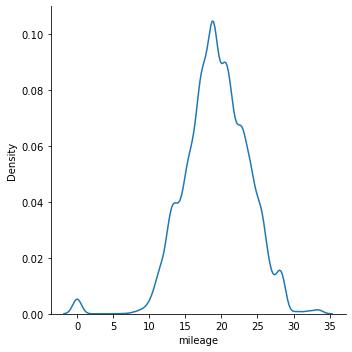

In [20]:
  sns.displot(data=df,x="mileage",kind="kde")

<AxesSubplot:xlabel='mileage'>

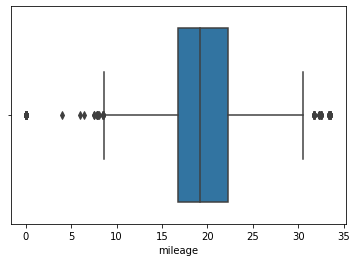

In [21]:
 sns.boxplot(x=df["mileage"])

**The engine column describes the engine capacity of the cars in unit CC. After analysing the column, it had text data which is removed and also some rows had entries like 'wheel size' which is clearly a data entry error, hence that also had to be removed.**

In [22]:
df['engine']=df['engine'].str.split(" ", n = 2, expand = True)[0].str[6:]
df['engine']=pd.to_numeric(df['engine'])

In [23]:
df['engine'].describe()

count    19872.000000
mean      1477.651822
std        520.001300
min          0.000000
25%       1197.000000
50%       1248.000000
75%       1582.000000
max       6752.000000
Name: engine, dtype: float64

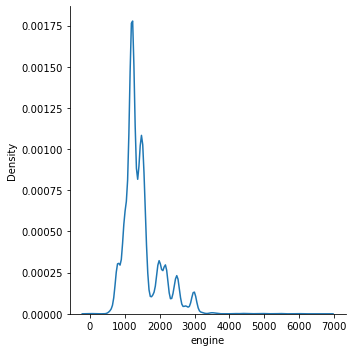

In [24]:
sns.displot(data=df,x="engine",kind="kde")

<AxesSubplot:xlabel='engine'>

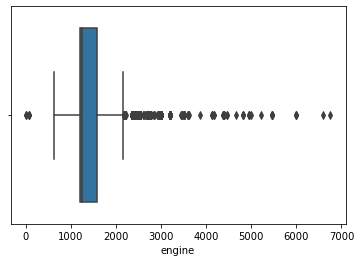

In [25]:
sns.boxplot(x=df["engine"])

**The maximum power column also had entries in Brake horsepower (bhp) with the text. The text is removed and few data entry errors are also removed and the column is also converted to numerical feature.**

In [26]:
df['max_power']=df['max_power'].str.split(" ", n = 2, expand = True)[1].str[5:]
df[df['max_power'] =='null'] = np.NaN ##After splitting a few values with string 'null' were left. Replacing those values with blanks.
df['max_power']=pd.to_numeric(df['max_power'])

In [27]:
df['max_power'].describe()

count    19639.000000
mean        99.462084
std         43.772478
min         34.200000
25%         73.940000
50%         86.800000
75%        114.000000
max        626.000000
Name: max_power, dtype: float64

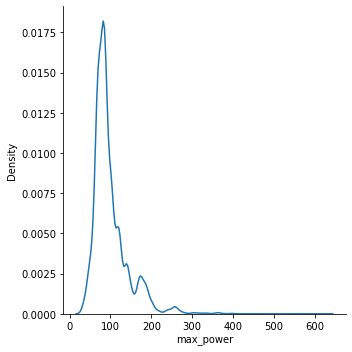

In [28]:
sns.displot(data=df,x="max_power",kind="kde")

<AxesSubplot:xlabel='max_power'>

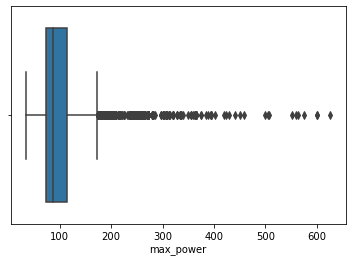

In [29]:
sns.boxplot(x=df["max_power"])

**Seats column is a categorical variable which describes the number of seats in a car. The column contains number of seats which text "SEATS" so this text has to be removed. Apart from text removal, few rows had N/A and Null values which also had to be converted to NaN.**

In [30]:
df['seats']=df['seats'].str[5:]
df[df['seats'] =='null'] = np.NaN ##After splitting a few values with string 'null' were left. Replacing those values with blanks.
df[df['seats'] =='N/A'] = np.NaN  ##After splitting a few values with string 'N/A' were left. Replacing those values with blanks.
df['seats']=pd.to_numeric(df['seats'])

**Frequency plot for seats columns**

**Observations**

*   **There are cars from 2 seats to 14 seats in the dataset.**
*   **The highest number of cars has 5 seats with 16350 cars**
*   **There are also a high frequency of 7 seater cars**



<Figure size 288x216 with 0 Axes>

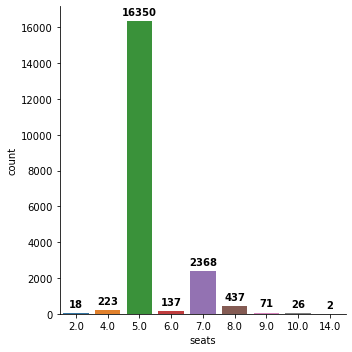

In [31]:
plt.figure(figsize=(4, 3))
plot = sns.catplot(x='seats', kind='count', data=df)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+500, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10)

**Replacing Values with string 'null' in the dataset.**

In [32]:
df[df =='null'] = np.NaN

**Dropping Duplicate Rows**

In [33]:
df.drop_duplicates()

,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Company,Model,selling_price
0,NaN,2012.0,Individual,120000.0,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,MARUTI,ALTO,120000.0
1,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,20000.0,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,HYUNDAI,GRAND,550000.0
2,NaN,2010.0,Individual,60000.0,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,HYUNDAI,I20,215000.0
3,NaN,2012.0,Individual,37000.0,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,MARUTI,ALTO,226000.0
4,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,FORD,ECOSPORT,570000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,NaN,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,23.59,1364.0,67.05,5.0,TOYOTA,PLATINUM,650000.0
20022,NaN,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,17.50,1373.0,91.10,7.0,MARUTI,ERTIGA,925000.0
20023,NaN,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,21.14,1498.0,103.52,5.0,SKODA,RAPID,425000.0
20024,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016.0,Dealer,3800000.0,First Owner,Diesel,Manual,16.00,2179.0,140.00,7.0,MAHINDRA,XUV500,1225000.0


**Since 83% of the cars in the dataset has 5 seats, hence replacing the null values in the setas column with mode i.e 5 seats.**

In [34]:
df['seats'].fillna(df['seats'].mode()[0], inplace=True)

**Intuitionally the maximum power and engine capacity of a car would be directly dependent on the number of seats. For example all 5 seater cars would have similar max power and engine capacity and all 10 seater cars will have a similar higher max power and engine capacity. Therefore, replacing the null values in max power and engine column with average values based on the groupby seats columns.**

In [35]:
mp=df.groupby(['seats'])['max_power'].mean().to_dict()
df.max_power = df.max_power.fillna(df.seats.map(mp))

In [36]:
en=df.groupby(['seats'])['engine'].mean().to_dict()
df.engine = df.engine.fillna(df.seats.map(en))

**Dropping Rows with Null in all columns**

In [37]:
df.dropna(subset=['Company'], inplace=True)

**Since both Company Name and Full Name have large categorical values hence removing both from final analysis**

In [38]:
df.drop('Company', inplace=True, axis=1)
df.drop('Model', inplace=True, axis=1)

**Dropping new-price column since it has more than 50% null values and does not provide any valuable information in the dataset.**

In [40]:
df.drop('new-price', inplace=True, axis=1)

**Year Column**

**Year column consists of the year the cars were manufactured in. This can also describe the age of the car if it is substracted from the current year.**

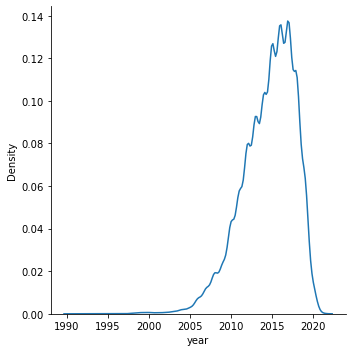

In [42]:
sns.displot(data=df,x="year",kind="kde")

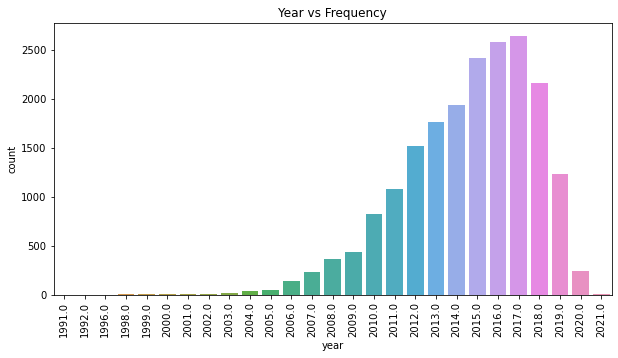

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='year' , data=df,)
plt.xticks(rotation=90);
plt.title("Year vs Frequency");

### **Univariate Analysis on Categorical Features**

In [44]:
df.describe(include='O')

,seller_type,owner_type,fuel_type,transmission_type
count,19744,19744,19744,19744
unique,3,3,5,2
top,Dealer,First Owner,Diesel,Manual
freq,11859,19738,9722,15809


**Seller Type Column**

**The seller type column has 2 major entries with 'individual' and 'dealer' based cars. The third category 'trustmark dealer' has only 190 entries which is negligible.**

<Figure size 288x216 with 0 Axes>

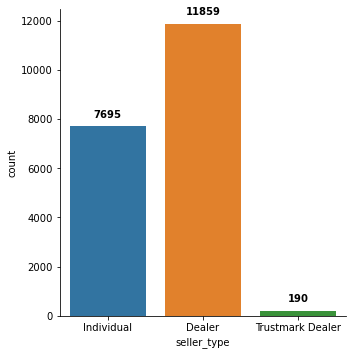

In [45]:
plt.figure(figsize=(4, 3))
plot = sns.catplot(x='seller_type', kind='count', data=df)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+500, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10)

**Owner Type**

**Owner type column describes the owner of the car whether it is first owner, second owner or third owner. More than 99% of the data has first owner seller type. Only 6 rown has second owner or third owner entries. Hence this can be considered as outliers. Therefore dropping the owner type column.**

<Figure size 288x216 with 0 Axes>

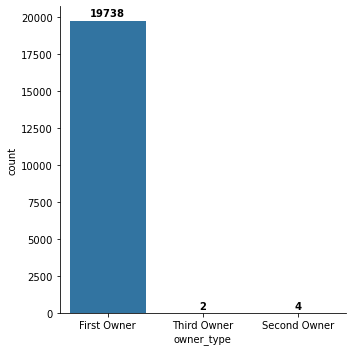

In [46]:
plt.figure(figsize=(4, 3))
plot = sns.catplot(x='owner_type', kind='count', data=df)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+500, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10)

In [47]:
df.drop('owner_type', inplace=True, axis=1)

**Fuel Type Column**

**Fuel type column has 5 entries types i.e Petrol, Diesel, CNG, Electric and LPG type cars. Here majority of cars are of Petrol and Diesel full category. With a marginal number of entries for CNG, LPG and Electric cars.**

<Figure size 288x216 with 0 Axes>

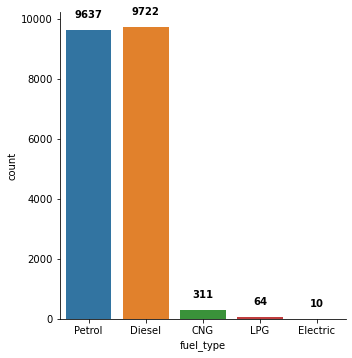

In [48]:
plt.figure(figsize=(4, 3))
plot = sns.catplot(x='fuel_type', kind='count', data=df)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+500, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10)

**Transmission Type Column**

**Transmission type column has 2 entries with manual or automatic cars.**

<Figure size 288x216 with 0 Axes>

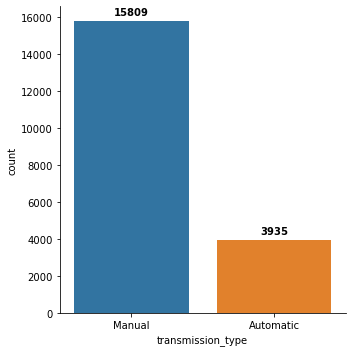

In [50]:
plt.figure(figsize=(4, 3))
plot = sns.catplot(x='transmission_type', kind='count', data=df)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+500, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10)

### **Bivariate Analysis**

**The following observations can be made from the above matrix:**



*   **The variable mileage has negative coefficient of correlation with every other variable except year column.**
*   **Maximum power and engine columns are highly positively correlated i.e. when one variable increases the other variable also increases.**
*    **Maximum power and selling price variable are also highly correlated i.e. higher the maximum power higher will be the selling price of the car.**



<AxesSubplot:>

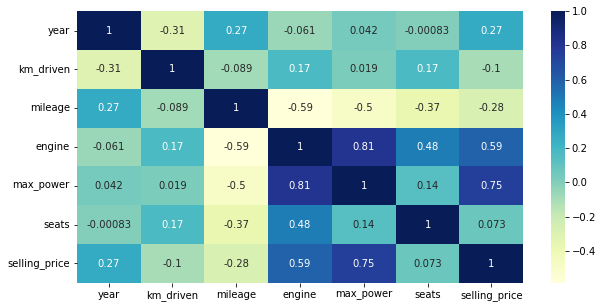

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr() ,  cmap="YlGnBu" , annot=True)

**Observation: It is observed that the cars manufactured in recent years have a higher selling price than the older cars. Here selling price is of continuous type and year is of discrete type that is why we are using scatter plot for the visualization.**

<AxesSubplot:title={'center':'selling_price vs year'}, xlabel='year', ylabel='selling_price'>

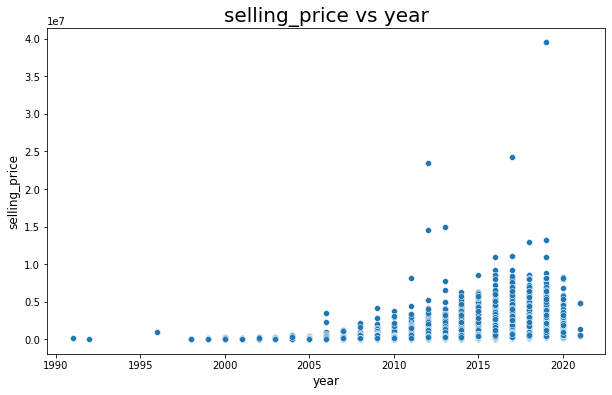

In [53]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('selling_price vs year',fontsize=20)
ax.set_xlabel('year',fontsize=12)
ax.set_ylabel('selling_price',fontsize=12)
sns.scatterplot(x='year',y='selling_price',data=df)

**Observation: Higher the mileage lower is the selling price. It can be seen from the plot that mileage with 20 kmpl and greater has lower selling price as compared to mileage with less than 20 kmpl. This can also be seen from the negative coefficient of correlation in the heat map matrix above.**

<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

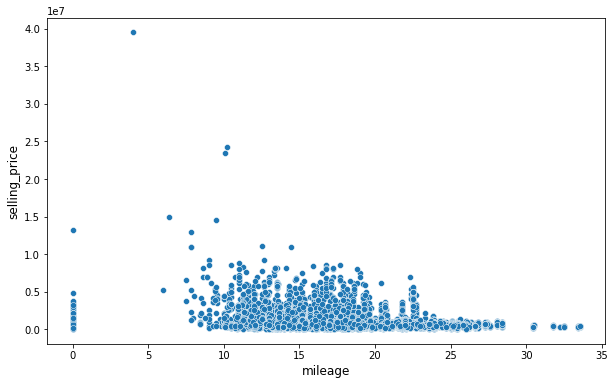

In [54]:
fig,ax = plt.subplots(figsize=(10,6))

ax.set_xlabel('mileage',fontsize=12)
ax.set_ylabel('selling_price',fontsize=12)
sns.scatterplot(x='mileage',y='selling_price',data=df)

**Observation: It can be observed that higher the engine capacity higher would be the selling price. It can also be validated with a correlation coefficient of 0.59.**

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

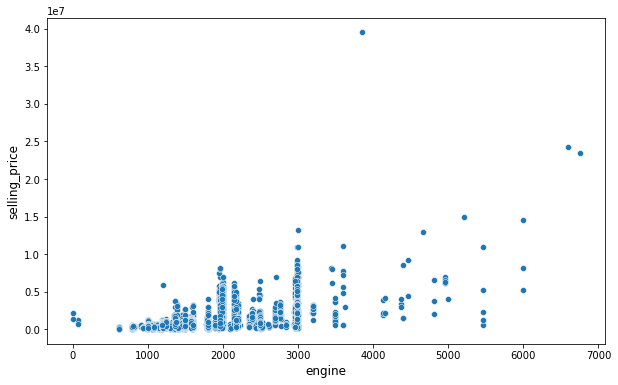

In [56]:
fig,ax = plt.subplots(figsize=(10,6))

ax.set_xlabel('engine',fontsize=12)
ax.set_ylabel('selling_price',fontsize=12)
sns.scatterplot(x='engine',y='selling_price',data=df)

<AxesSubplot:title={'center':'max power vs engine'}, xlabel='engine', ylabel='max_power'>

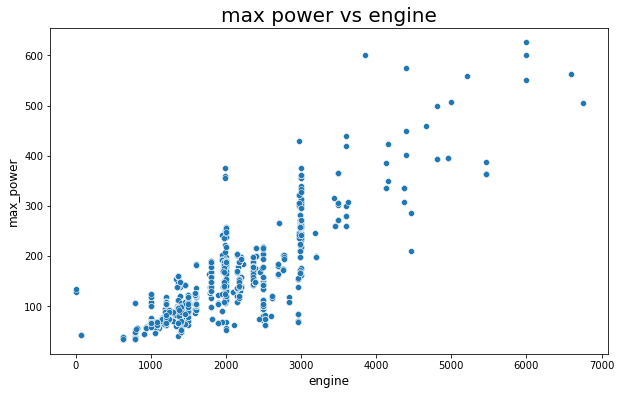

In [57]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('max power vs engine',fontsize=20)
ax.set_xlabel('engine',fontsize=12)
ax.set_ylabel('max_power',fontsize=12)
sns.scatterplot(x='engine',y='max_power',data=df)

**Observation: With a high correlation of 0.75 there is also a positive relation between the above two variables.**

<AxesSubplot:xlabel='max power', ylabel='selling_price'>

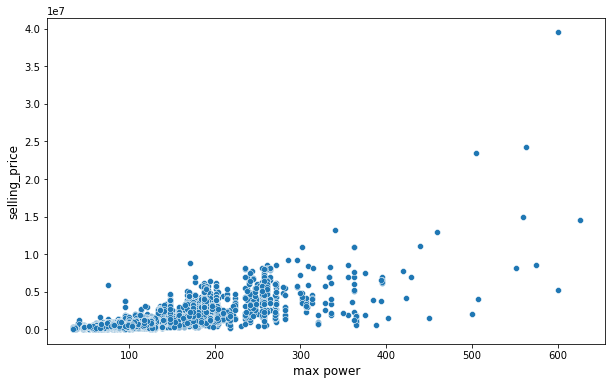

In [58]:
fig,ax = plt.subplots(figsize=(10,6))

ax.set_xlabel('max power',fontsize=12)
ax.set_ylabel('selling_price',fontsize=12)
sns.scatterplot(x='max_power',y='selling_price',data=df)

<AxesSubplot:title={'center':'selling_price vs km driven'}, xlabel='km driven', ylabel='selling_price'>

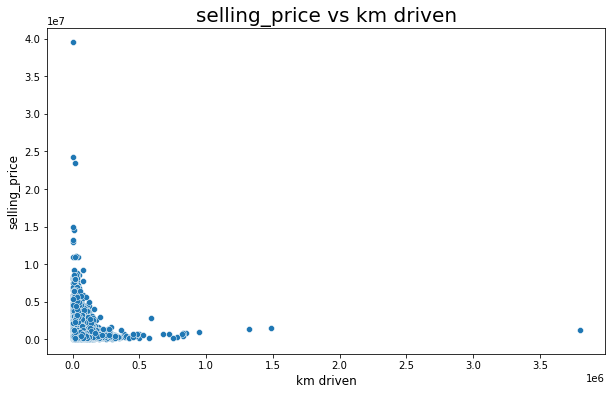

In [59]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('selling_price vs km driven',fontsize=20)
ax.set_xlabel('km driven',fontsize=12)
ax.set_ylabel('selling_price',fontsize=12)
sns.scatterplot(x='km_driven',y='selling_price',data=df)

<AxesSubplot:title={'center':'selling_price vs seats'}, xlabel='seats', ylabel='selling_price'>

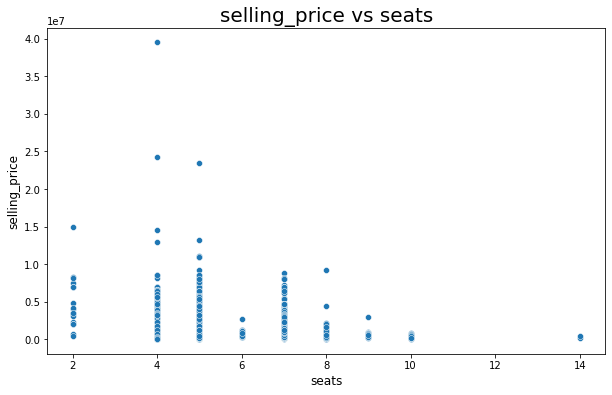

In [60]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('selling_price vs seats',fontsize=20)
ax.set_xlabel('seats',fontsize=12)
ax.set_ylabel('selling_price',fontsize=12)
sns.scatterplot(x='seats',y='selling_price',data=df)

**Here we are using box plot method since one variable is categorical and one is continuous and it can be clearly observed that Dealer seller type have a higher aggregate selling price from Individual and Trustmark Dealers seller types.**

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

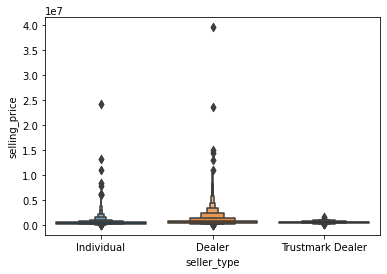

In [61]:
sns.boxenplot(x = 'seller_type', y = 'selling_price', data = df)

<AxesSubplot:xlabel='fuel_type', ylabel='engine'>

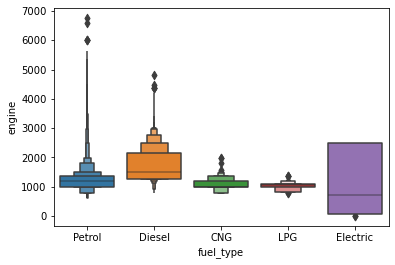

In [62]:
sns.boxenplot(x = 'fuel_type', y = 'engine', data = df)

**Observation: Automatic type cars have a higher selling price than Manual type cars.**

<AxesSubplot:xlabel='transmission_type', ylabel='selling_price'>

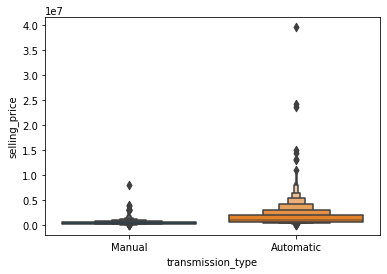

In [63]:
sns.boxenplot(x = 'transmission_type', y = 'selling_price', data = df)

<AxesSubplot:xlabel='transmission_type', ylabel='max_power'>

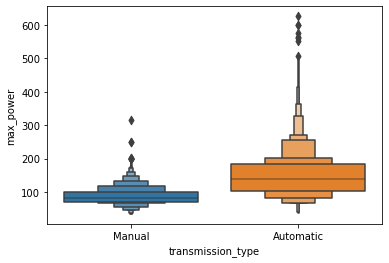

In [64]:
sns.boxenplot(x = 'transmission_type', y = 'max_power', data = df)

### **Creating Copy of Original Analysed dataset. All the encoding techniques will be applied on the copied dataframe.**

In [65]:
df1=df.copy()

### **Encoding of Categorical Features**

**One Hot Encoding on seller_type**

In [66]:
one_hot_st = pd.get_dummies(df1['seller_type'],drop_first=True)
df1 = df1.drop('seller_type',axis = 1)
df1 = df1.join(one_hot_st)

**One Hot Encoding on transmission_type**

In [67]:
one_hot_tt = pd.get_dummies(df1['transmission_type'],drop_first=True)
df1 = df1.drop('transmission_type',axis = 1)
df1 = df1.join(one_hot_tt)

**One Hot Encoding on fuel_type**

In [68]:
one_hot_ft = pd.get_dummies(df1['fuel_type'],drop_first=True)
df1 = df1.drop('fuel_type',axis = 1)
df1 = df1.join(one_hot_ft)

In [69]:
df1.head()

,year,km_driven,mileage,engine,max_power,seats,selling_price,Individual,Trustmark Dealer,Manual,Diesel,Electric,LPG,Petrol
0,2012.0,120000.0,19.70,796.0,46.30,5.0,120000.0,1,0,1,0,0,0,1
1,2016.0,20000.0,18.90,1197.0,82.00,5.0,550000.0,1,0,1,0,0,0,1
2,2010.0,60000.0,17.00,1197.0,80.00,5.0,215000.0,1,0,1,0,0,0,1
3,2012.0,37000.0,20.92,998.0,67.10,5.0,226000.0,1,0,1,0,0,0,1
4,2015.0,30000.0,22.77,1498.0,98.59,5.0,570000.0,0,0,1,1,0,0,0


In [70]:
df2=df1.copy()

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
cols_to_scale = ['year','km_driven','mileage','engine','max_power','seats']
scaler.fit(df1[cols_to_scale])
df1[cols_to_scale] = scaler.transform(df1[cols_to_scale])

In [72]:
y = df1['selling_price']
X = df1.drop(['selling_price'], axis = 1)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# R2 Performance Metric from Scratch

In [74]:
def r2_value(y,y_pred):
  y_mean=np.mean(y)
  ss_reg=np.sum(np.square(np.subtract(y,y_pred)))
  ss_tot=np.sum(np.square(np.subtract(y,y_mean)))
  R_square=1-(ss_reg/ss_tot)
  return R_square

# Linear Regression - 10-Fold Cross Validation

In [75]:
%%time
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
LR=cross_val_score(lr,X_train,y_train,scoring='r2',cv=10)
lr.fit(X_train,y_train)
predict_lr=lr.predict(X_test)
print("R2 CV Scores : ",LR)
print("Mean r2 CV Score : ",np.mean(LR))
print("R2 value on test dataset : ",r2_value(y_test,predict_lr))

R2 CV Scores :  [0.46494071 0.65539609 0.66216354 0.6746759  0.70115272 0.68518357
 0.61673803 0.58984915 0.64729044 0.61020436]
Mean r2 CV Score :  0.6307594510672113
R2 value on test dataset :  0.668316285144045
Wall time: 279 ms


# Lasso Regression - 10-Fold Cross Validation

In [76]:
%%time
from sklearn.linear_model import Lasso
lasso = Lasso()
LASSO=cross_val_score(lasso,X_train,y_train,scoring='r2',cv=10)
lasso.fit(X_train,y_train)
predict_lasso=lasso.predict(X_test)

print("CV Scores : ",LASSO)
print("Mean CV Score : ",np.mean(LASSO))
print("R2 value on test dataset : ",r2_value(y_test,predict_lasso))

CV Scores :  [0.46494208 0.65539607 0.66216471 0.67467302 0.70115908 0.68518213
 0.6167415  0.5898454  0.64729221 0.61020307]
Mean CV Score :  0.6307599281689273
R2 value on test dataset :  0.6683158582855311
Wall time: 297 ms


# K-NN Regressor - 10-Fold Cross Validation

In [77]:
%%time
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
KNN=cross_val_score(neigh,X_train,y_train,scoring='r2',cv=10)
neigh.fit(X_train,y_train)
predict_knn=neigh.predict(X_test)
print("CV Scores : ",KNN)
print("Mean CV Score : ",np.mean(KNN))
print("R2 value on test dataset : ",r2_value(y_test,predict_knn))

CV Scores :  [0.54440823 0.87398009 0.8780468  0.86540809 0.88170786 0.85240839
 0.841151   0.78894387 0.89322246 0.86805702]
Mean CV Score :  0.8287333785573512
R2 value on test dataset :  0.8432506776202495
Wall time: 994 ms


# Decision Tree - 10-Fold Cross Validation

In [78]:
y1 = df2['selling_price']
X1 = df2.drop(['selling_price'], axis = 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=1)

In [83]:
%%time
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
DT=cross_val_score(dt,X_train1,y_train1,scoring='r2',cv=10)
dt.fit(X_train1,y_train1)
predict_dt=dt.predict(X_test1)
print("CV Scores : ",DT)
print("Mean CV Score : ",np.mean(DT))
print("R2 value on test dataset : ",r2_value(y_test1,predict_dt))

CV Scores :  [ 0.64341307  0.84927848  0.91325948  0.84249385  0.86673608  0.77727164
 -0.12108531  0.60495142  0.88648911  0.90401453]
Mean CV Score :  0.7166822346357667
R2 value on test dataset :  0.8695671887311918
Wall time: 562 ms


# Random Forest - 10-Fold Cross Validation

In [122]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()
rf_random.fit(X_train1,y_train1)
predict_rf=rf_random.predict(X_test1)

Wall time: 3.29 s


# XGBoost - 10-Fold Cross Validation

In [85]:
%%time
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
XGB=cross_val_score(xg_reg,X_train1,y_train1,scoring='r2',cv=10)
xg_reg.fit(X_train1,y_train1)
predict_xgb=xg_reg.predict(X_test1)
print("CV Scores : ",XGB)
print("Mean CV Score : ",np.mean(XGB))
print("R2 value on test dataset : ",r2_value(y_test1,predict_xgb))

CV Scores :  [0.71846711 0.94172205 0.91082024 0.92318954 0.9439498  0.54108628
 0.40930029 0.68572031 0.93510103 0.94397881]
Mean CV Score :  0.795333545067355
R2 value on test dataset :  0.9110439619012481
Wall time: 4.7 s


# Random Search CV with K-Fold CV from Scratch

In [86]:
import warnings
warnings.filterwarnings("ignore")

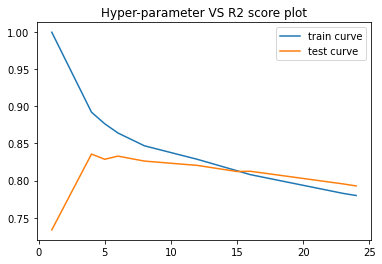

Wall time: 56.2 s


In [88]:
%%time
import random
from random import sample
def RandomSearchCV(X_train,Y_train,regressor, param_range, folds):
    
    train_scores=[]
    cv_scores=[]
    
    #Creating 10 random integers from the range give in variable 'param_range'.
    para=[]
    r1=param_range[0]
    r2=param_range[1]
    while(r1<r2+1):
        para.append(r1)
        r1+=1
    params=sample(para,10)
    params.sort()
    
    for k in params:
        
        #Splitting x-train and y-train into subarrays according to the fold value.
        x_t=[]
        y_t=[]
        for i in range (0,folds):
            j=0
            if i>=1:
                j=j+1
            x_t.append(X_train[(int((len(X_train)/folds)*i)+j):(int(len(X_train)/folds)*(i+1))])
            y_t.append(Y_train[(int((len(Y_train)/folds)*i)+j):(int(len(Y_train)/folds)*(i+1))])
        train_scores_fold=[]
        cv_scores_fold=[]
        for i in range (0,folds):
            
            
            x_cv=x_t[i]
            y_cv=y_t[i]
            x_train=np.zeros((1,13))
            y_train=np.zeros((1))
            for m in range (0,folds):
                if i!=m:
                    x_train=np.concatenate((x_train,x_t[m]))
                    y_train=np.concatenate((y_train,y_t[m]))
                    
            #Calculating r2 scores for test and cv datasets.       
            x_train=np.delete(x_train,0,0)
            y_train=np.delete(y_train,0,0)
            
            regressor.n_neighbors=k
            regressor.fit(x_train,y_train)
            
            Y_predicted=regressor.predict(x_cv)
            cv_scores_fold.append(r2_score(y_cv,Y_predicted))
            
            Y_predicted=regressor.predict(x_train)
            train_scores_fold.append(r2_score(y_train,Y_predicted))
        train_scores.append(np.mean(np.array(train_scores_fold)))
        cv_scores.append(np.mean(np.array(cv_scores_fold)))
    return train_scores,cv_scores,params
param_range=(1,25)
folds=10
neigh = KNeighborsRegressor()
trainscores,testscores,params=RandomSearchCV(X_train,y_train,neigh,param_range,folds)
plt.plot(params,trainscores, label='train curve')
plt.plot(params,testscores, label='test curve')
plt.title('Hyper-parameter VS R2 score plot')
plt.legend()
plt.show()

# k=15 is the best value of hyperparameter

# Grid Search CV for Lasso Regression

In [89]:
%%time
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
lasso_alphas = np.logspace(-3,3,num=14)
lasso_gscv = GridSearchCV(lasso, param_grid=dict(alpha=lasso_alphas), cv = 10, scoring='r2')
lasso_gscv.fit(X_train, y_train)
print(lasso_gscv.best_params_)
print(lasso_gscv.best_score_)

{'alpha': 119.37766417144383}
0.6308104343035263
Wall time: 3.01 s


In [90]:
predict_lasso_hpt=lasso_gscv.predict(X_test)
print("R2 value on test dataset : ",r2_value(y_test,predict_lasso_hpt))

R2 value on test dataset :  0.66823565687871


# Grid Search CV for Decision Tree

In [91]:
%%time
dt_params = [{'max_depth': list(range(1, 15)), 'max_leaf_nodes':list(range(0,100))}]
dt_gscv = GridSearchCV(dt, dt_params, cv = 10, scoring='r2')
dt_gscv.fit(X_train1, y_train1)
print(dt_gscv.best_params_)
print(dt_gscv.best_score_)

{'max_depth': 8, 'max_leaf_nodes': 98}
0.8108286676055825
Wall time: 3min 50s


In [93]:
predict_dt_hpt=dt_gscv.predict(X_test1)
print("R2 value on test dataset : ",r2_value(y_test1,predict_dt_hpt))

R2 value on test dataset :  0.869093938788791


# Grid Search CV for XGBoost

In [94]:
%%time
import warnings
warnings.filterwarnings("ignore")
xgb_params = [{'max_depth': list(range(1, 10)), 'learning_rate': list(np.linspace(0,1,10)), 'n_estimators':list(range(1,10))}]
xgb_gscv = GridSearchCV(xg_reg, xgb_params, cv = 10, scoring='r2')
xgb_gscv.fit(X_train1, y_train1)
print(xgb_gscv.best_params_)
print(xgb_gscv.best_score_)

{'learning_rate': 0.7777777777777777, 'max_depth': 4, 'n_estimators': 9}
0.8108836607113881
Wall time: 6min 25s


In [98]:
predict_xgb_hpt=xgb_gscv.predict(X_test1)
print("R2 value on test dataset : ",r2_value(y_test1,predict_xgb_hpt))

R2 value on test dataset :  0.8612790948980606


# Grid Search CV for Random Forest

In [96]:
from pprint import pprint
print('Parameters used in default setting:\n')
pprint(rf.get_params())

Parameters used in default setting:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [97]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
random_grid = {'n_estimators': n_estimators}
rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10)
rf_rscv.fit(X_train1, y_train1)
rf_rscv.best_params_

Wall time: 1h 10min 32s


{'n_estimators': 1000}

In [99]:
predict_rf_rscv=rf_rscv.predict(X_test1)
print("R2 value on test dataset : ",r2_value(y_test1,predict_xgb_hpt))

R2 value on test dataset :  0.8612790948980606


In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15795 entries, 16382 to 237
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              15795 non-null  float64
 1   km_driven         15795 non-null  float64
 2   mileage           15795 non-null  float64
 3   engine            15795 non-null  float64
 4   max_power         15795 non-null  float64
 5   seats             15795 non-null  float64
 6   Individual        15795 non-null  uint8  
 7   Trustmark Dealer  15795 non-null  uint8  
 8   Manual            15795 non-null  uint8  
 9   Diesel            15795 non-null  uint8  
 10  Electric          15795 non-null  uint8  
 11  LPG               15795 non-null  uint8  
 12  Petrol            15795 non-null  uint8  
dtypes: float64(6), uint8(7)
memory usage: 971.8 KB


In [105]:
df3=df1.copy()

In [107]:
df3 = df3.rename(columns={'Trustmark Dealer': 'Trustmark_Dealer'})

In [108]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19744 entries, 0 to 20025
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              19744 non-null  float64
 1   km_driven         19744 non-null  float64
 2   mileage           19744 non-null  float64
 3   engine            19744 non-null  float64
 4   max_power         19744 non-null  float64
 5   seats             19744 non-null  float64
 6   selling_price     19744 non-null  float64
 7   Individual        19744 non-null  uint8  
 8   Trustmark_Dealer  19744 non-null  uint8  
 9   Manual            19744 non-null  uint8  
 10  Diesel            19744 non-null  uint8  
 11  Electric          19744 non-null  uint8  
 12  LPG               19744 non-null  uint8  
 13  Petrol            19744 non-null  uint8  
dtypes: float64(7), uint8(7)
memory usage: 1.8 MB


In [109]:
y_final = df3['selling_price']
X_final = df3.drop(['selling_price'], axis = 1)

In [110]:

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.20, random_state=1)

In [115]:
%%time
import xgboost as xgb
xg_reg_final = xgb.XGBRegressor()
XGB_final=cross_val_score(xg_reg_final,X_train_final,y_train_final,scoring='r2',cv=10)
xg_reg_final.fit(X_train_final,y_train_final)
predict_xgb_final=xg_reg.predict(X_test_final)
print("CV Scores : ",XGB_final)
print("Mean CV Score : ",np.mean(XGB_final))
print("R2 value on test dataset : ",r2_value(y_test_final,predict_xgb_final))

CV Scores :  [0.71846814 0.94172205 0.91057739 0.92310967 0.9439498  0.54109052
 0.40859015 0.68569053 0.93511365 0.94397881]
Mean CV Score :  0.7952290701390704
R2 value on test dataset :  0.9110778286736068
Wall time: 4.53 s


In [123]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)